<div align="right" style="text-align: right"><i>Peter Norvig, Oct 2017<br>Data updated monthly</i></div>

# Bicycling Statistics

During a pandemic, bicycling is a great way to (1) spend some time, (2) get some exercise, (3) stay far enough away from others to be safe, and (4) generate some data to analyze. This notebook does the analysis on three types of data:
- **places**: percentages of  the roads that I have ridden in each town, city, county, etc. (from [Wandrer.earth](https://wandrer.earth/athletes/3534/)). 
- **rides**: a random sampling of my 20+ mile rides, and all my 60+ mile rides (from [Strava](https://www.strava.com/athletes/575579)). 
- **segments**: short sections of a mile or so long, chosen to have a variety of steepness  (from [Strava](https://www.strava.com/athletes/575579)). 


This notebook is mostly for my own benefit, but if you're a cyclist you're welcome to adapt it to your data, and if you're a data scientist, you might find it an interesting example of exploratory data analysis.

# Wandering Places

The website [**Wandrer.earth**](https://wandrer.earth) tracks the  distinct roads a user has biked on. It provides a fun incentive to get out and explore new roads. The site is gamified in a way that the biggest rewards are for first reaching 25% of the road-miles in each city or neighborhood, and then 90%.  (You get no credit for repeating a road you've already been on.)

For the most part, your scores can only go up, as you cover more roads over time. But the [underlying map](https://www.openstreetmap.org/) is periodically updated, and sometimes roads are added or removed from a city's map, so your mileage may vary. 

The wandrer.earth site does a great job of showing my current status in all the places I've been, but I wanted to track my progress month-by-month, so I created the charts below.

Each line in the legend gives the percentage of roads ridden (miles ridden / total miles), miles to go to the next percentage reward, and the name of the town or area. The companion notebook [**BikeCode.ipynb**](BikeCode.ipynb) has the implementation details.

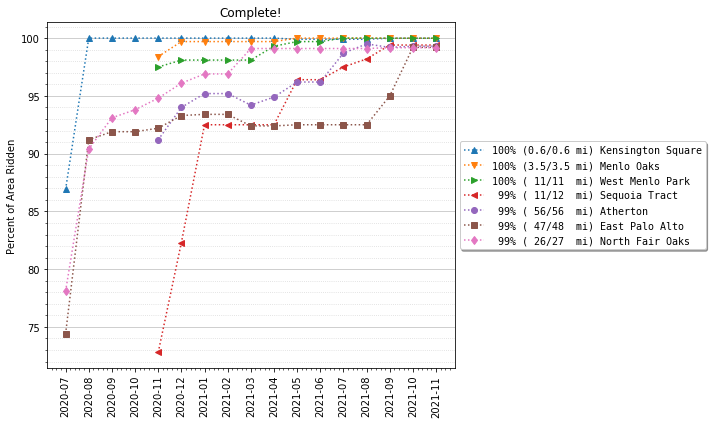

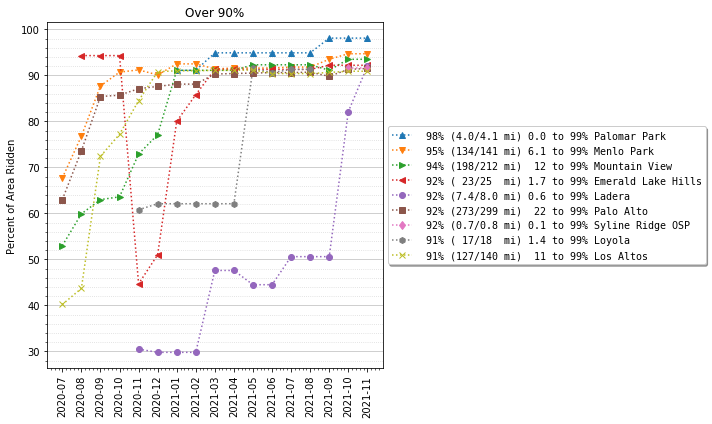

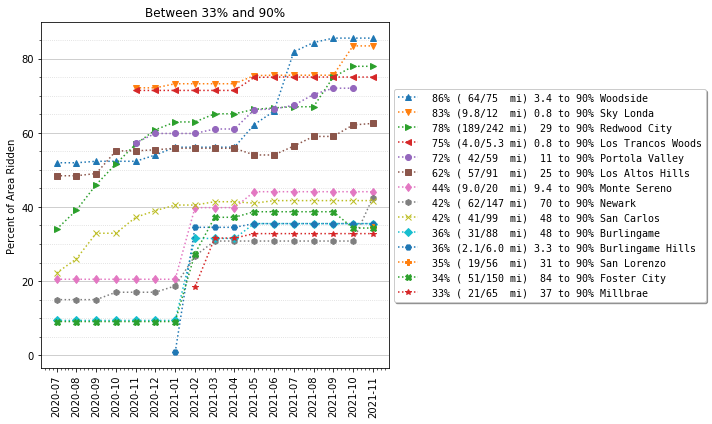

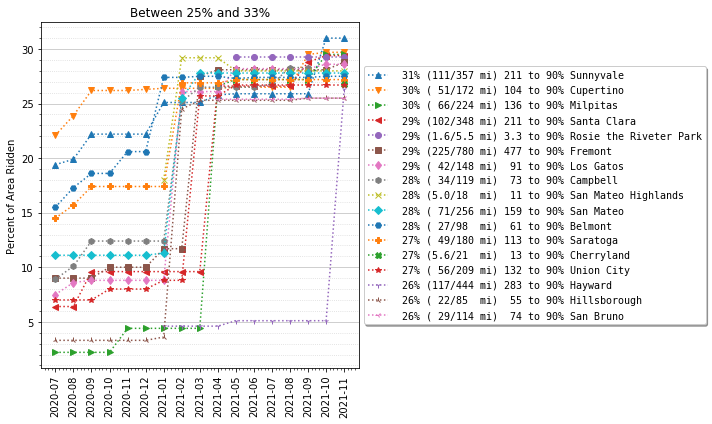

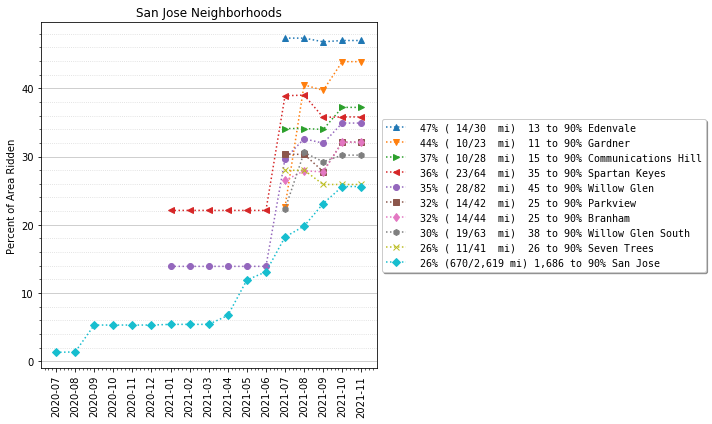

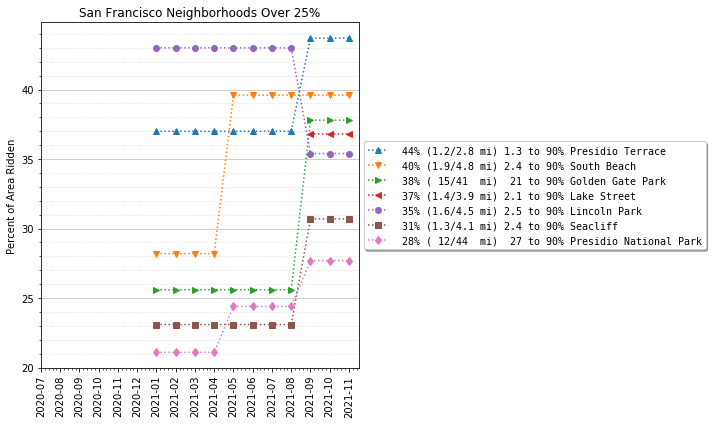

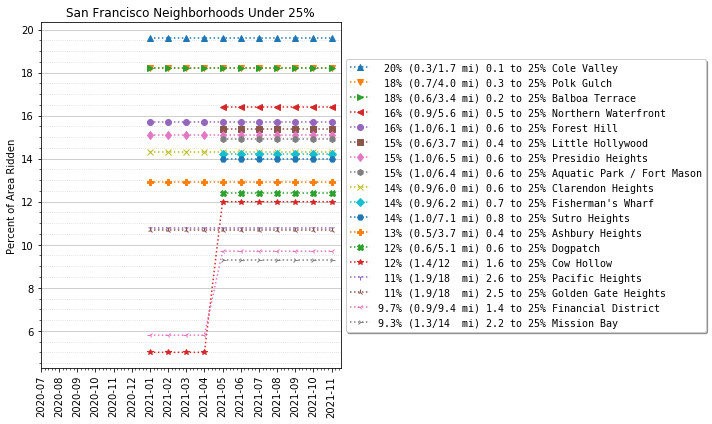

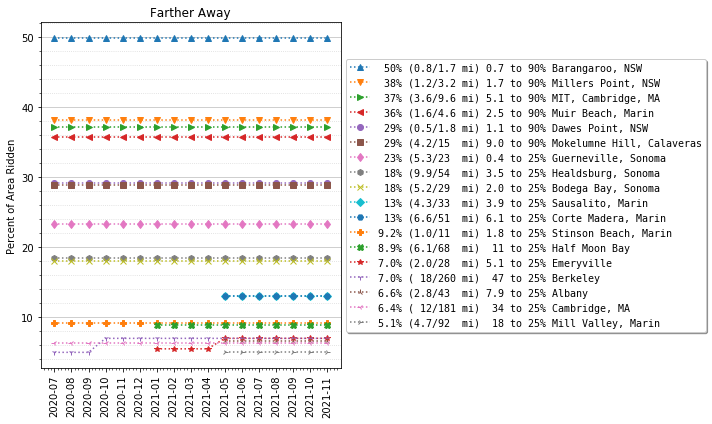

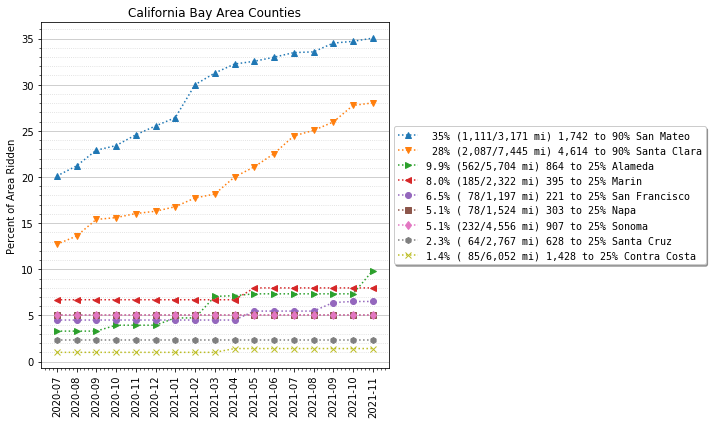

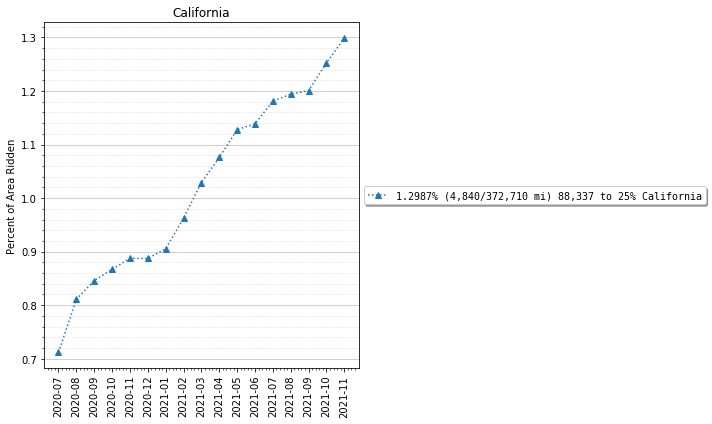

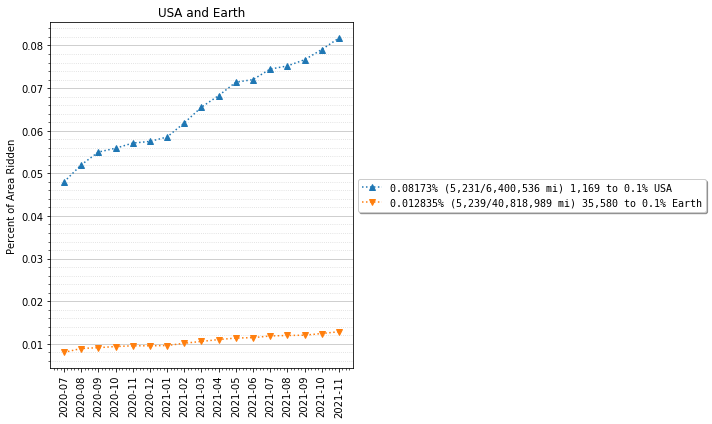

In [1]:
%run BikeCode.ipynb
wandering(places)

# Eddington Number

The  physicist [Sir Arthur Eddington](https://en.wikipedia.org/wiki/Arthur_Eddington), a contemporary of Einstein, was a pre-Strava bicyclist who favored this metric:

> *Your [**Eddington Number**](https://www.triathlete.com/2011/04/training/measuring-bike-miles-eddington-number_301789) is the largest integer **e** such that you have cycled at least **e** miles on at least **e** days.*

My Eddington number progress over the years, in miles and  also in kilometers:

,year,Ed_km,Ed_mi
0,2021,92,65
1,2020,86,61
2,2019,79,55
3,2018,76,53
4,2017,72,51
5,2016,65,46
6,2015,60,41
7,2014,45,34
8,2013,27,23


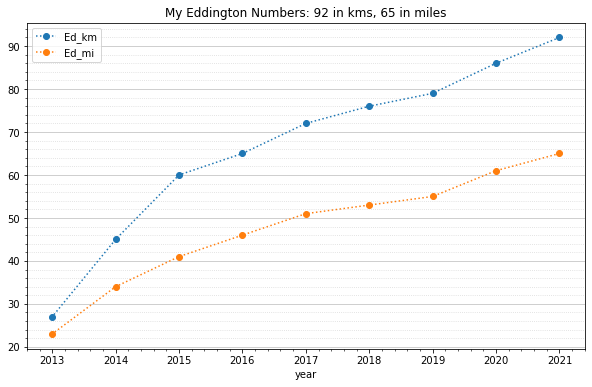

In [2]:
Ed_progress()

**My Eddington Number is 65 in miles and 92 in kilometers**: I've ridden at least 65 miles on at least 65 days (but not 66 miles on 66 days). My number is above [the mean for Strava](https://swinny.net/Cycling/-4687-Calculate-your-Eddington-Number), but not nearly as good as Eddington himself: his number in miles was **84** when he died at age 62, and his roads, bicycles, and navigation aids were not nearly as nice as mine, so bravo zulu to him. 

How many more rides will I need to reach higher Eddington numbers? I call that the *Eddington Gap*:

,kms,Ed gap (kms),miles,Ed gap (miles)
0,92,-2,65,-3
1,93,2,66,3
2,94,6,67,12
3,95,9,68,16
4,96,11,69,28
5,97,16,70,35
6,98,20,71,41
7,99,23,72,44
8,100,25,73,48
9,101,27,74,50


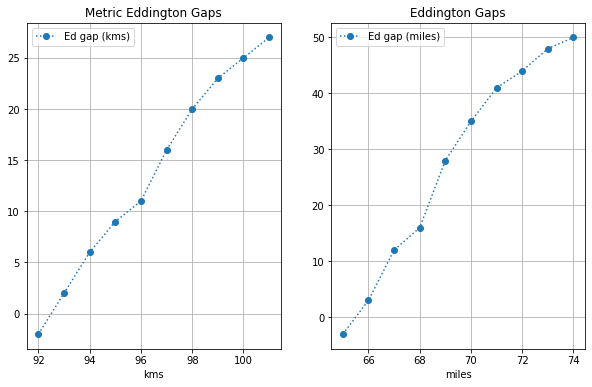

In [3]:
Ed_gaps(rides)

In kilometers, I need 2 rides to improve from 92 to 93, but I need 25 rides to improve to 100.

In miles, I need 3 rides to improve from 65 to 66, and 50 rides(!) to improve to 74.

Here are some properties of Eddington numbers:
- Your Eddington number is monotonic: it can never decrease over time. 
- To improve from an Eddington number of *n* to *n* + 1 can take as few as 1 ride, or as many as *n* + 1 rides.
  + *Suppose you have done 9 rides, each of exactly 10 miles. Your Eddington number is 9.*
  + *You would need 1 ride of 10 miles to improve from a number of 9 to 10.*
  + *You would then need 11 rides of 11 miles to improve from a number 10 to 11.*
- Your metric Eddington number will always be greater than or equal to your imperial Eddington number.
- Your metric Eddington number will never be more than 1.609344 times your  imperial Eddington number.
- Of two riders, it is possible that one has a higher metric number and the other a higher imperial number.

*Note:* the definition of Eddington Number seems precise, but what exactly does ***day*** mean? The New Oxford dictionary has three senses:

1. a period of 24 hours; 
2. a unit of time, reckoned from one midnight to the next;
3. the part of a day when it is light. 

I originally assumed sense 2, but I wanted to accept sense 1 for [bikepacking](https://bikepacking.com/) trips where I rode to a camping site in the afternoon, pitched a tent for the night, and rode back home the next morning; what bikepackers call a [sub-24-hour overnight](https://oneofsevenproject.com/s24o-bikepacking-guide/) (S24O).  And then COVID struck, the camping sites closed, so why not allow an S24O ride where I sleep in my own home (as long as COVID restrictions persist)? I realize Eddington had a lot more hardships than we have (World War I, the 1918 pandemic, and World War II, for example), but I hope he would approve of this modest accomodation on my part.

# Hill-Index: Speed versus Grade on Short Climbs

The Eddington number reminds me of the [**h-index**](https://en.wikipedia.org/wiki/H-index) metric for scientific publications. I invented another metric:

> *Your **hill-index** is the maximum integer **h** where you can regularly climb an **h** percent grade at **h** miles per hour.*

I'll plot grade versus speed for segments (not rides) with two best-fit curves: a blue quadratic and an orange cubic. I'll also superimpose a red dotted line where grade = speed.

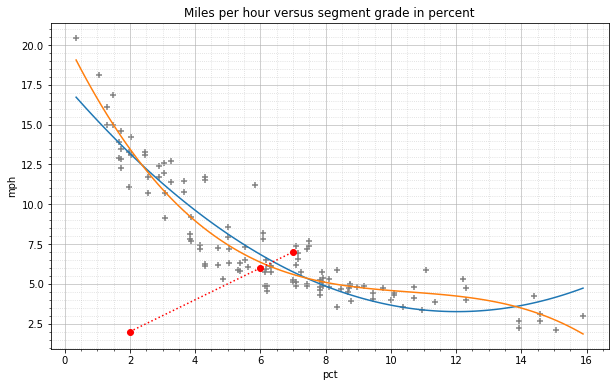

In [4]:
show('pct', 'mph', segments, 'Miles per hour versus segment grade in percent')
plt.plot((2, 6, 7), (2, 6, 7), 'ro:');

Both  best-fit curves are above the red circle at 6% and below the red circle for 7%, so  **my hill-index is 6**. We also see that I can cruise at 15 to 17 mph on a 1% grade, but only about 8 mph at 5% grade, and around 5 mph on 8% grades.

 # Speed versus Grade on Long Rides

The plot above tell me how fast I should expect to climb a particular hill, but what about average time on longer rides? Here's a plot of my speed versus steepness (measured in feet climbed per mile rather than in percent).

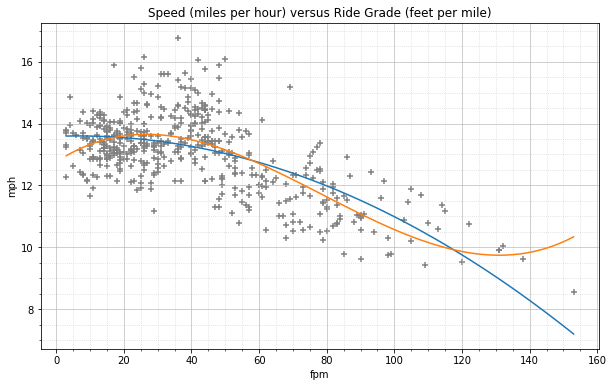

In [5]:
show('fpm', 'mph', rides, 'Speed (miles per hour) versus Ride Grade (feet per mile)')

So, I average a little under 14 mph when the overall route is fairly flat, with a lot of variability from 12 to 16 mph, depending more on my level of effort (and maybe the wind) than on the grade of the road. But when the grade is steeper than 50 ft/mile, my speed falls off quickly: down to 12mph at 80 ft/mile;  11 mph at 100 ft/mile; and around 10 mph at 120 ft/mile. Note that 120 ft/mile is only 2.3% grade, but if you figure a typical route is 1/3 up, 1/3 down, and 1/3 flat, then that's 6.9% average grade on the up part.

I can use this to predict the time of a ride.  For example, if I'm in  La Honda and want to get to Pescadero, which is faster: the [coast route](https://www.google.com/maps/dir/La+Honda,+California/Pescadero,+California/@37.2905834,-122.3896683,12z/data=!4m19!4m18!1m10!1m1!1s0x808faed4dc6265bd:0x51a109d3306a7219!2m2!1d-122.274227!2d37.3190255!3m4!1m2!1d-122.4039496!2d37.3116594!3s0x808f062b7d7585e7:0x942480c22f110b74!1m5!1m1!1s0x808f00b4b613c4c1:0x43c609077878b77!2m2!1d-122.3830152!2d37.2551636!3e1) (15.7 miles, 361 ft climb), or the  [creek route](https://www.google.com/maps/dir/La+Honda,+California/Pescadero,+California/@37.2905834,-122.3896683,12z/data=!4m19!4m18!1m10!1m1!1s0x808faed4dc6265bd:0x51a109d3306a7219!2m2!1d-122.274227!2d37.3190255!3m4!1m2!1d-122.3658887!2d37.2538867!3s0x808f00acf265bd43:0xb7e2a0c9ee355c3a!1m5!1m1!1s0x808f00b4b613c4c1:0x43c609077878b77!2m2!1d-122.3830152!2d37.2551636!3e1) (13.5 miles, 853 ft climb)? We can estimate:

In [6]:
f'Coast: {estimate(15.7, 361)} min, Creek: {estimate(13.5, 853)} min.'

'Coast: 70.0 min, Creek: 64.0 min.'

This predicts the shorter but steeper creek route would be about 6 minutes faster (whereas Google Maps predicts the creek route would be 80 minutes, 2 more than the coast route—I guess Google lacks confidence in my climbing ability).  This is all good to know, but other factors (like the scenery and whether I want to stop at the San Gregorio store) are probably more important in making the choice.

# VAM

Climbing speed measured by vertical ascent in meters per hour is known as [VAM](https://en.wikipedia.org/wiki/VAM_%28bicycling%29), which stands for *velocità ascensionale media* (for native Campagnolo speakers) or *vertical ascent in meters* (for SRAM) or 平均上昇率 (for Shimano), and sometimes by Vm/h. The theory is that for steep climbs, most of your power is going into lifting against gravity, so your VAM should be about constant no matter what the grade in that range. (For flatish climbs power is spent on wind and rolling resistance, and for the very steepest of climbs, in my experience,  power goes largely to cursing *sotto voce*, as they say in Italian.) 

Here's a plot of my VAM versus grade over short segments:

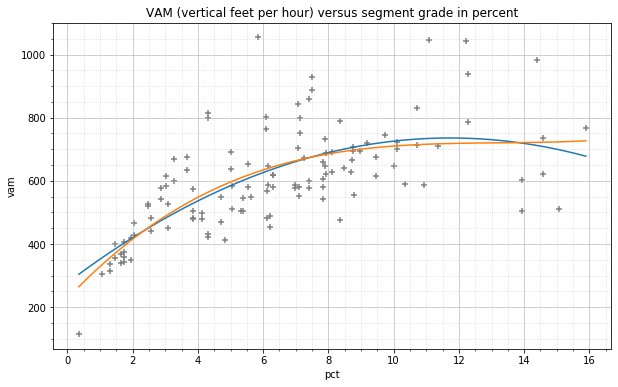

In [7]:
show('pct', 'vam', segments, 'VAM (vertical feet per hour) versus segment grade in percent')

Champion cyclists can do over 1800 meters/hour over a 10 km climb, and can sustain [1400 meters/hour for 7 hours](https://www.strava.com/activities/4996833865).  My VAM numbers range mostly from 400 to 900 meters/hour, but I can sustain the higher numbers for only a couple of minutes:

In [8]:
top(segments, 'vam')

,title,hours,miles,feet,mph,vam,fpm,pct,kms
21,Davenport Kicker,0.0214,0.24,74,11.21,1054.0,308.0,5.84,0.39
59,Paloma Climb,0.0239,0.14,82,5.86,1046.0,586.0,11.09,0.23
45,Limantour Spit,0.0886,0.47,303,5.30,1042.0,645.0,12.21,0.76
22,Entrance Way Hill Repeats,0.0236,0.10,76,4.24,982.0,760.0,14.39,0.16
112,Westridge 3min,0.0781,0.37,240,4.74,937.0,649.0,12.29,0.60
99,Tunitas flattens,0.0544,0.42,166,7.72,930.0,395.0,7.49,0.68
100,Tunitas flattens,0.0569,0.42,166,7.38,889.0,395.0,7.49,0.68
44,Laning Bump,0.0333,0.24,94,7.21,860.0,392.0,7.42,0.39
57,Old La Honda Mile 1,0.1339,0.99,370,7.39,842.0,374.0,7.08,1.59
110,Westridge,0.1411,0.68,385,4.82,832.0,566.0,10.72,1.09


On segments that are at least two kilometers long my VAM tops out at about 800 meters/hour, and 500 meters/hour is  typical:

In [9]:
top(segments[segments.kms > 2], 'vam')

,title,hours,miles,feet,mph,vam,fpm,pct,kms
55,Old La Honda (Bridge to Stop),0.4783,3.33,1255,6.96,800.0,377.0,7.14,5.36
56,Old La Honda (Bridge to Stop),0.5089,3.33,1255,6.54,752.0,377.0,7.14,5.36
119,Woodside Climb,0.1347,1.71,295,12.69,668.0,173.0,3.27,2.75
41,Kings Greer to Skyline,0.7814,3.92,1536,5.02,599.0,392.0,7.42,6.31
120,Woodside Climb,0.1500,1.71,295,11.40,599.0,173.0,3.27,2.75
25,Haskins,0.2964,1.51,566,5.09,582.0,375.0,7.10,2.43
42,Kings Greer to Skyline,0.8100,3.92,1536,4.84,578.0,392.0,7.42,6.31
101,Tunitas lower climb,0.2261,1.30,421,5.75,568.0,324.0,6.13,2.09
26,Haskins,0.3119,1.51,566,4.84,553.0,375.0,7.10,2.43
37,Kings half way,0.4572,2.89,820,6.32,547.0,284.0,5.37,4.65


I can also look at VAM numbers for complete rides. I would expect the ride VAM to be half the segment VAM (or less) since most of my rides are circuits where I return to the start, and thus no more than half the ride is climbing. Sure enough, the best I can do is about 400 meters/hour:

In [10]:
top(rides, 'vam')

,date,year,title,hours,miles,feet,mph,vam,fpm,pct,kms
231,"Sun, 11/29",2015,Mt. Hamilton,3.6800,37.00,4902,10.05,406.0,132.0,2.51,59.53
14,"Fri, 4/2",2021,Everesting 5: climb 2×(OLH + WOLH),3.2750,31.48,4344,9.61,404.0,138.0,2.61,50.65
18,"Mon, 3/29",2021,Everesting 1: Mt Diablo,2.5964,22.22,3406,8.56,400.0,153.0,2.90,35.75
17,"Tue, 3/30",2021,Everesting 2: Kings + WOLH + OLH,3.3414,35.99,4377,10.77,399.0,122.0,2.30,57.91
238,"Sat, 11/25",2017,Mt. Hamilton,3.6894,36.65,4806,9.93,397.0,131.0,2.48,58.97
220,"Sun, 12/1",2013,Mt. Hamilton,3.7836,37.56,4921,9.93,396.0,131.0,2.48,60.43
198,"Fri, 10/30",2015,OLH / West Alpine,3.4794,39.51,4505,11.36,395.0,114.0,2.16,63.57
96,"Sat, 4/26",2014,OLH / Tunitas Creek,5.2572,58.69,6742,11.16,391.0,115.0,2.18,94.43
87,"Sat, 4/18",2015,Tunitas + Lobitos Creeks,5.2439,61.27,6611,11.68,384.0,108.0,2.04,98.58
71,"Wed, 10/14",2015,Half Moon Bay,6.1319,72.97,7644,11.90,380.0,105.0,1.98,117.41


In [11]:
rides[rides.feet > 4000]

,date,year,title,hours,miles,feet,mph,vam,fpm,pct,kms
10,"Sun, 4/11",2021,OLH / Tunitas,6.1067,66.04,4629,10.81,231.0,70.0,1.33,106.26
13,"Sat, 4/3",2021,Everesting 6: OLH / West Alpine,4.4378,46.64,4400,10.51,302.0,94.0,1.79,75.04
14,"Fri, 4/2",2021,Everesting 5: climb 2×(OLH + WOLH),3.2750,31.48,4344,9.61,404.0,138.0,2.61,50.65
15,"Thu, 4/1",2021,Everesting 4: Kings / Tunitas / Bike Hut,4.6767,45.57,4452,9.74,290.0,98.0,1.85,73.32
16,"Wed, 3/31",2021,Everesting 3: Ring of Fire + Ladera,4.6831,45.78,4544,9.78,296.0,99.0,1.88,73.66
17,"Tue, 3/30",2021,Everesting 2: Kings + WOLH + OLH,3.3414,35.99,4377,10.77,399.0,122.0,2.30,57.91
52,"Sat, 8/31",2019,San Gregorio via OLH,5.2225,65.31,4026,12.51,235.0,62.0,1.17,105.08
58,"Sun, 6/2",2019,The Sequoia,6.6786,77.51,6467,11.61,295.0,83.0,1.58,124.71
61,"Sat, 5/13",2017,Morgan Hill iCare Classic,7.4558,100.05,4596,13.42,188.0,46.0,0.87,160.98
62,"Sat, 5/12",2018,"ICare Classic, Morgan Hill",6.7961,91.29,4160,13.43,187.0,46.0,0.86,146.89


# Exploring the Data: `rides` and `segments`




In [12]:
rides.describe() # Summary statistics for the rides

,year,hours,miles,feet,mph,vam,fpm,pct,kms
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,2016.579158,3.171036,40.774649,1676.308617,13.030020,154.941884,40.671343,0.770100,65.606313
std,2.009827,1.324910,16.177986,1365.337279,1.279228,89.527399,27.146934,0.514081,26.030345
min,2012.000000,1.540000,20.960000,68.000000,8.560000,10.000000,3.000000,0.050000,33.720000
25%,2015.000000,2.164000,28.270000,686.000000,12.290000,79.000000,19.000000,0.365000,45.485000
50%,2017.000000,2.716100,35.390000,1293.000000,13.180000,148.000000,35.000000,0.670000,56.940000
75%,2018.000000,3.769300,48.190000,2156.000000,13.800000,209.000000,53.500000,1.015000,77.540000
max,2021.000000,8.137500,101.000000,7644.000000,16.770000,406.000000,153.000000,2.900000,162.510000


In [13]:
segments.describe() # Summary statistics for the segments

,hours,miles,feet,mph,vam,fpm,pct,kms
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,0.156991,1.031405,291.107438,7.538264,601.925620,340.165289,6.442479,1.659421
std,0.182637,1.028784,309.852325,3.821121,163.615462,184.923603,3.502424,1.654889
min,0.021400,0.100000,35.000000,2.110000,115.000000,18.000000,0.350000,0.160000
25%,0.060000,0.420000,112.000000,4.820000,497.000000,203.000000,3.850000,0.680000
50%,0.101400,0.710000,180.000000,6.100000,588.000000,328.000000,6.210000,1.140000
75%,0.170800,1.220000,339.000000,10.700000,693.000000,442.000000,8.360000,1.960000
max,1.390600,7.380000,1887.000000,20.470000,1054.000000,839.000000,15.890000,11.870000


In [14]:
top(rides, 'mph') # Fastest rides (of more than 20 miles)

,date,year,title,hours,miles,feet,mph,vam,fpm,pct,kms
237,"Sun, 5/22",2016,Canada,2.1867,36.68,1332,16.77,186.0,36.0,0.69,59.02
261,"Wed, 9/13",2017,Healdburg / Jimtown,2.1342,34.45,912,16.14,130.0,26.0,0.50,55.43
482,"Sat, 1/25",2014,Woodside,1.5606,25.08,1243,16.07,243.0,50.0,0.94,40.35
491,"Sat, 4/11",2015,Woodside,1.5400,24.73,1035,16.06,205.0,42.0,0.79,39.79
5,"Sun, 7/11",2021,San Jose,4.0969,65.10,1086,15.89,81.0,17.0,0.32,104.75
442,"Sun, 1/18",2015,Woodside,1.6378,26.02,1257,15.89,234.0,48.0,0.91,41.87
480,"Fri, 6/24",2016,Foothill Expway,1.5903,25.11,623,15.79,119.0,25.0,0.47,40.40
281,"Sun, 1/26",2014,Canada Rd,2.0997,33.12,1446,15.77,210.0,44.0,0.83,53.29
305,"Sun, 4/12",2015,Palo Alto Cycling,2.0303,31.76,1210,15.64,182.0,38.0,0.72,51.10
147,"Sun, 10/15",2017,Los Gatos,2.8647,44.71,1437,15.61,153.0,32.0,0.61,71.94


In [15]:
top(segments, 'mph') # Fastest segments (there are no descent segments in the database)

,title,hours,miles,feet,mph,vam,fpm,pct,kms
64,PCH Pescadero to Bean Hollow,0.1353,2.77,51,20.47,115.0,18.0,0.35,4.46
27,Highway 1 Cascanoa to Cascade,0.0889,1.61,89,18.11,305.0,55.0,1.05,2.59
29,Highway 9 Mantalvo,0.0267,0.45,35,16.85,400.0,78.0,1.47,0.72
105,Vickrey Fruitvale,0.0614,0.99,68,16.12,338.0,69.0,1.30,1.59
30,Highway 9 Mantalvo,0.0300,0.45,35,15.00,356.0,78.0,1.47,0.72
106,Vickrey Fruitvale,0.0661,0.99,68,14.98,314.0,69.0,1.30,1.59
94,The Boneyard,0.1014,1.48,135,14.60,406.0,91.0,1.73,2.38
78,Sand Hill Alpine to 280,0.1172,1.67,180,14.25,468.0,108.0,2.04,2.69
14,Canada to College,0.0986,1.37,119,13.89,368.0,87.0,1.65,2.20
95,The Boneyard,0.1100,1.48,135,13.45,374.0,91.0,1.73,2.38


In [16]:
top(segments, 'feet') # Biggest climbing segments

,title,hours,miles,feet,mph,vam,fpm,pct,kms
109,West Alpine full,1.3906,7.38,1887,5.31,414.0,256.0,4.84,11.87
41,Kings Greer to Skyline,0.7814,3.92,1536,5.02,599.0,392.0,7.42,6.31
42,Kings Greer to Skyline,0.8100,3.92,1536,4.84,578.0,392.0,7.42,6.31
55,Old La Honda (Bridge to Stop),0.4783,3.33,1255,6.96,800.0,377.0,7.14,5.36
56,Old La Honda (Bridge to Stop),0.5089,3.33,1255,6.54,752.0,377.0,7.14,5.36
0,Alma Mountain Charlie,0.5303,3.12,875,5.88,503.0,280.0,5.31,5.02
37,Kings half way,0.4572,2.89,820,6.32,547.0,284.0,5.37,4.65
38,Kings half way,0.4958,2.89,820,5.83,504.0,284.0,5.37,4.65
6,Alpine Portola to top Joaquin,0.5767,3.52,801,6.10,423.0,228.0,4.31,5.66
5,Alpine Portola to top Joaquin,0.5661,3.52,801,6.22,431.0,228.0,4.31,5.66


In [17]:
top(segments, 'pct') # Steepest climbs

,title,hours,miles,feet,mph,vam,fpm,pct,kms
72,Redwood Gulch hits,0.0600,0.18,151,3.00,767.0,839.0,15.89,0.29
46,Limantour steepest,0.0947,0.20,159,2.11,512.0,795.0,15.06,0.32
33,Joaquin,0.1053,0.33,254,3.13,735.0,770.0,14.58,0.53
34,Joaquin,0.1242,0.33,254,2.66,623.0,770.0,14.58,0.53
22,Entrance Way Hill Repeats,0.0236,0.10,76,4.24,982.0,760.0,14.39,0.16
87,Stirrup Wall,0.0631,0.17,125,2.69,604.0,735.0,13.93,0.27
88,Stirrup Wall,0.0758,0.17,125,2.24,503.0,735.0,13.93,0.27
112,Westridge 3min,0.0781,0.37,240,4.74,937.0,649.0,12.29,0.60
113,Westridge 3min,0.0931,0.37,240,3.97,786.0,649.0,12.29,0.60
45,Limantour Spit,0.0886,0.47,303,5.30,1042.0,645.0,12.21,0.76
